# Figures
Generic figures for timelag synthesis paper

In [1]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from sunpy.map import Map
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize,SqrtStretch,AsinhStretch

import synthesizAR
from synthesizAR.visualize import bgry_004_idl_cmap

from formatting import rwb_cmap,get_figsize,hist_step,heating_palette,qualitative_palette,timelag_cmap

import warnings
warnings.filterwarnings('ignore',category=UserWarning,)

%matplotlib inline

## Active Region Maps

In [2]:
ar = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/base_noaa1158/')

In [3]:
aia_map = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/aia/cutouts/aia_lev1.5_20110212T153348_171_cutout.fits')

In [4]:
hmi_map = Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/observational_data/hmi/hmi_m_45s_2011_02_12_15_33_45_tai_magnetogram.fits')
hmi_map = hmi_map.rotate(order=3)
hmi_map = hmi_map.submap(aia_map.bottom_left_coord,aia_map.top_right_coord)

/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


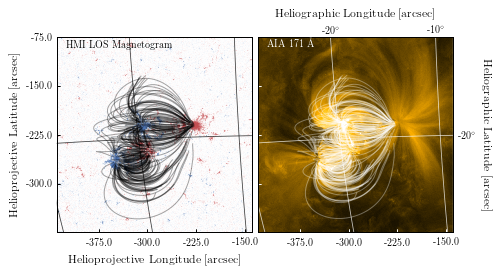

In [5]:
fig = plt.figure(figsize=get_figsize(wf=1,))
line_frequency = 20
plt.subplots_adjust(wspace=0.03)
####################
## HMI
ax = fig.add_subplot(1,2,1,projection=hmi_map,)
hmi_map.plot(title=False,annotate=False,norm=matplotlib.colors.SymLogNorm(100,vmin=-1e3,vmax=1e3),cmap=rwb_cmap())
for l in ar.loops[::line_frequency]:
    c = l.coordinates.transform_to('heliographic_stonyhurst').transform_to(hmi_map.coordinate_frame)
    ax.plot_coord(c, '-', color='k', lw=1, alpha=0.35)
ax.grid(alpha=0)
# HPC Axes
lon,lat = ax.coords[0],ax.coords[1]
lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
lon.set_axislabel(r'Helioprojective Longitude [arcsec]', fontsize=plt.rcParams['axes.labelsize'])
lat.set_axislabel(r'Helioprojective Latitude [arcsec]', fontsize=plt.rcParams['axes.labelsize'])
# HGS Axes
hgs_lon,hgs_lat = hmi_map.draw_grid(axes=ax,grid_spacing=10*u.deg,alpha=0.75,color='k')
hgs_lat.set_ticklabel_visible(False)
hgs_lon.set_ticklabel_visible(False)
hgs_lon.set_axislabel('')#'Helioprojective Longitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lat.set_axislabel('')#'Helioprojective Latitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lat.set_ticks_visible(False)
hgs_lon.set_ticks_visible(False)
hgs_lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
hgs_lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
# Label
xtext,ytext = hmi_map.world_to_pixel(SkyCoord(Tx=-425*u.arcsec,Ty=-90*u.arcsec,frame=hmi_map.coordinate_frame))
xtext,ytext = int(xtext.value),int(ytext.value)
ax.text(xtext,ytext,'HMI LOS Magnetogram',color='k')#,fontsize=plt.rcParams['axes.labelsize'])
#####################
## AIA -- 171
ax = fig.add_subplot(1,2,2,projection=aia_map,)
aia_map.plot(title=False,annotate=False,norm=ImageNormalize(vmin=0,vmax=5e3,stretch=AsinhStretch(0.1)))
for l in ar.loops[::line_frequency]:
    c = l.coordinates.transform_to('heliographic_stonyhurst').transform_to(aia_map.coordinate_frame)
    ax.plot_coord(c, '-', color='w', lw=1, alpha=0.35)
ax.grid(alpha=0)
# HPC Axes
lon,lat = ax.coords[0],ax.coords[1]
lon.set_ticks(color='w')
lat.set_ticks(color='w')
lat.set_ticklabel_visible(False)
# HGS Axes
hgs_lon,hgs_lat = aia_map.draw_grid(axes=ax,grid_spacing=10*u.deg,alpha=0.75,color='w')
hgs_lat.set_axislabel('Heliographic Latitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lon.set_axislabel('Heliographic Longitude [arcsec]',fontsize=plt.rcParams['axes.labelsize'])
hgs_lat.set_ticklabel_visible(True)
hgs_lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
hgs_lon.set_ticklabel_visible(True)
hgs_lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
hgs_lat.set_ticks_visible(False)
hgs_lon.set_ticks_visible(False)
# Label
xtext,ytext = aia_map.world_to_pixel(SkyCoord(Tx=-425*u.arcsec,Ty=-90*u.arcsec,frame=aia_map.coordinate_frame))
xtext,ytext = int(xtext.value),int(ytext.value)
ax.text(xtext,ytext,'AIA 171 $\mathrm{\AA}$',color='w')#,fontsize=plt.rcParams['axes.labelsize'])
#######################
# Save
fig.savefig('figures/hmi_aia_lines.pdf',)

## Loop Length Distribution

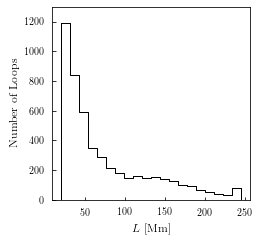

In [6]:
fig = plt.figure(figsize=get_figsize(wf=0.5,hf=1))
ax = fig.gca()
vals,bins = np.histogram([l.full_length.to(u.Mm).value for l in ar.loops],bins='scott',)
hist_step(ax,vals,bins,color='k')
ax.set_xlabel(r'$L$ [Mm]');
ax.set_ylabel(r'Number of Loops');
ax.set_ylim(0,1300)
fig.savefig('figures/loop_distribution.pdf')

## Heating
Plot the temperature, density, and heating for the three primary heating cases. 

In [7]:
ar_high = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/field_checkpoint/')
ar_intermediate = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/field_checkpoint/')
ar_low = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/field_checkpoint/')

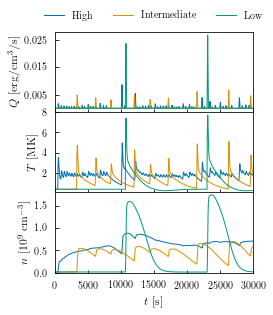

In [47]:
fig,axes = plt.subplots(3,1,figsize=get_figsize(wf=0.5,hf=1.25),sharex=True)
plt.subplots_adjust(hspace=0.)
colors = heating_palette()
i_loop=680
# Heating
## Read the heating 
h = np.loadtxt(os.path.join(os.path.dirname(
    ar_high.loops[i_loop].parameters_savefile),f'hydro_results/{ar_high.loops[i_loop].name}'))[:,-1]
axes[0].plot(ar_high.loops[i_loop].time, h, color=colors[0],label='High',)
h = np.loadtxt(os.path.join(os.path.dirname(
    ar_intermediate.loops[i_loop].parameters_savefile),f'hydro_results/{ar_intermediate.loops[i_loop].name}'))[:,-1]
axes[0].plot(ar_intermediate.loops[i_loop].time, h, color=colors[1],label='Intermediate',)
h = np.loadtxt(os.path.join(os.path.dirname(
    ar_low.loops[i_loop].parameters_savefile),f'hydro_results/{ar_low.loops[i_loop].name}'))[:,-1]
axes[0].plot(ar_low.loops[i_loop].time, h, color=colors[2],label='Low',)
axes[0].legend(ncol=3,loc="lower left", bbox_to_anchor=(-0.1,1.02),frameon=False,)

# Temperature
axes[1].plot(ar_high.loops[i_loop].time,ar_high.loops[i_loop].electron_temperature[:,0].to(u.MK),
             color=colors[0],)
axes[1].plot(ar_intermediate.loops[i_loop].time,ar_intermediate.loops[i_loop].electron_temperature[:,0].to(u.MK),
             color=colors[1],)
axes[1].plot(ar_low.loops[i_loop].time,ar_low.loops[i_loop].electron_temperature[:,0].to(u.MK),
             color=colors[2],)

# Density
axes[2].plot(ar_high.loops[i_loop].time,ar_high.loops[i_loop].density[:,0]/1e9,
             color=colors[0],)
axes[2].plot(ar_intermediate.loops[i_loop].time,ar_intermediate.loops[i_loop].density[:,0]/1e9,
             color=colors[1],)
axes[2].plot(ar_low.loops[i_loop].time,ar_low.loops[i_loop].density[:,0]/1e9,
             color=colors[2],)

# Labels and limits
axes[0].set_xlim(0,3e4)
#axes[0].set_ylim(-1e-3,2e-2)
axes[0].set_yticks([0.005,0.015,0.025])
axes[1].set_ylim(0.1,8)
#axes[1].set_yticks(axes[1].get_yticks()[1:-1])
axes[2].set_ylim(0,1.8)
axes[0].set_ylabel(r'$Q$ [erg$/$cm$^{3}$$/$s]')
axes[1].set_ylabel(r'$T$ [MK]')
axes[2].set_ylabel(r'$n$ [10$^9$ cm$^{-3}$]')
axes[2].set_xlabel(r'$t$ [s]')
# Save
fig.savefig('figures/hydro_profiles.pdf',)

In [33]:
ar_high.loops[i_loop].full_length/2

<Quantity 4.00907471e+09 cm>

In [34]:
ar_high.loops[i_loop].field_strength.mean()

<Quantity 29.7181555 G>

## Phase Space Plot
Show $n-T$ phase space with a line of constant pressure overlaid.

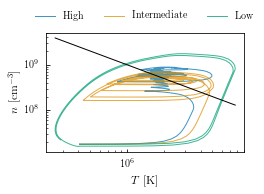

In [41]:
fig = plt.figure(figsize=get_figsize(wf=0.5))
colors = heating_palette()
ax = fig.gca()
labels = ['High','Intermediate','Low']
min_T = 1e300*u.K
max_T = 0*u.K
for i,loop in enumerate([ar_high.loops[i_loop],ar_intermediate.loops[i_loop],ar_low.loops[i_loop]]):
    ax.plot(loop.electron_temperature[:,0],loop.density[:,0],color=colors[i],alpha=0.75,label=labels[i])
    min_T = min(min_T, loop.electron_temperature.min())
    max_T = max(max_T, loop.electron_temperature.max())
p = 1e15*u.K/(u.cm**3)
T = np.linspace(min_T,max_T,1000)
ax.plot(T,p/T,color='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$n$ [cm$^{-3}$]')
ax.set_xlabel(r'$T$ [K]')
ax.legend(ncol=3,loc="lower left", bbox_to_anchor=(-0.1,1.02),frameon=False,)
fig.savefig('figures/nt_phase_space.pdf')

## Intensity Maps
Show intensity in each EUV channel for all three heating scenarios. Should be a 6-by-3 grid of figures. The snapshot will be at $t=15\times10^3$ s.

In [71]:
path_format = '/storage-home/w/wtb2/data/timelag_synthesis_v2/{}/nei/SDO_AIA/{}/map_t{:06d}.fits'

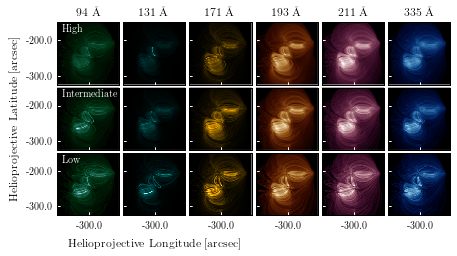

In [87]:
fig = plt.figure(figsize=get_figsize(wf=1,hf=3/6))
plt.subplots_adjust(hspace=0.05,wspace=0.025)
t = 1500
heating = ['high_frequency', 'intermediate_frequency','low_frequency']
channels = [94,131,171,193,211,335]
for i,f in enumerate(heating):
    for j,c in enumerate(channels):
        m = Map(path_format.format(f,c,t))
        m = m.submap(SkyCoord(Tx=-390*u.arcsec,Ty=-325*u.arcsec,frame=m.coordinate_frame),
                     SkyCoord(Tx=-215*u.arcsec,Ty=-150*u.arcsec,frame=m.coordinate_frame))
        ax = fig.add_subplot(3,6,6*i+j+1,projection=m)
        norm = ImageNormalize(
            vmin=0,vmax=Map(path_format.format('low_frequency',c,t)).data.max(),
            stretch=SqrtStretch())
        m.plot(axes=ax,title=False,annotate=False,norm=norm)
        ax.grid(alpha=0)
        lon,lat = ax.coords
        lon.set_ticks(color='w',number=2)
        lat.set_ticks(color='w',number=2)
        if i<len(heating)-1:
            lon.set_ticklabel_visible(False)
        else:
            lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
        if j > 0:
            lat.set_ticklabel_visible(False)
        else:
            lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
        if i==len(heating)-1 and j==1:
            lon.set_axislabel(r'Helioprojective Longitude [arcsec]',
                              fontsize=plt.rcParams['axes.labelsize'])
        if i==len(heating)-2 and j==0:
            lat.set_axislabel(r'Helioprojective Latitude [arcsec]',
                              fontsize=plt.rcParams['axes.labelsize'])
        if i==0:
            ax.set_title(f'{c} $\mathrm{{\AA}}$')
        if j == 0:
            xtext,ytext = m.world_to_pixel(
                SkyCoord(-375*u.arcsec, -175*u.arcsec, frame=m.coordinate_frame))
            ax.text(xtext.value,ytext.value,f'{f.split("_")[0].capitalize()}',
                    color='w',fontsize=plt.rcParams['xtick.labelsize'])
fig.savefig('figures/intensity_maps.pdf')

Unfortunately, the page is not quite long enough to fit all of these panels so we need to split these up into two separate figures.

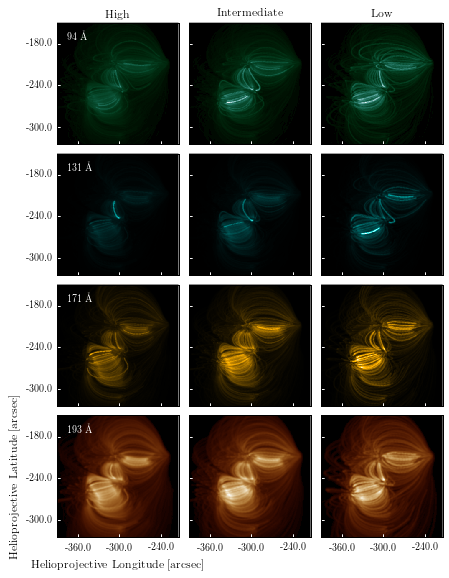

In [13]:
fig = plt.figure(figsize=get_figsize(wf=1,hf=4/3))
plt.subplots_adjust(hspace=0.075,wspace=0.0)
t = 1500
channels = [94,131,171,193,]#211,335]
for i,f in enumerate(['high_frequency', 'intermediate_frequency','low_frequency']):
    for j,c in enumerate(channels):
        m = Map(path_format.format(f,c,t))
        m = m.submap(SkyCoord(Tx=-390*u.arcsec,Ty=-325*u.arcsec,frame=m.coordinate_frame),
                     SkyCoord(Tx=-215*u.arcsec,Ty=-150*u.arcsec,frame=m.coordinate_frame))
        ax = fig.add_subplot(len(channels),3,3*j+i+1,projection=m)
        norm = ImageNormalize(
            vmin=0,vmax=Map(path_format.format('low_frequency',c,t)).data.max(),
            stretch=SqrtStretch())
        m.plot(axes=ax,title=False,annotate=False,norm=norm)
        ax.grid(alpha=0)
        lon,lat = ax.coords
        lon.set_ticks(color='w',number=4)
        lat.set_ticks(color='w',number=4)
        if i>0:
            lat.set_ticklabel_visible(False)
        if j < len(channels)-1:
            lon.set_ticklabel_visible(False)
        if i==0 and j==(len(channels)-1):
            lon.set_axislabel(r'Helioprojective Longitude [arcsec]',
                              fontsize=plt.rcParams['axes.labelsize'])
            lat.set_axislabel(r'Helioprojective Latitude [arcsec]',
                              fontsize=plt.rcParams['axes.labelsize'])
        if j==0:
            ax.set_title(f'{f.split("_")[0].capitalize()}')
        if i == 0:
            xtext,ytext = m.world_to_pixel(
                SkyCoord(-375*u.arcsec, -175*u.arcsec, frame=m.coordinate_frame))
            ax.text(xtext.value,ytext.value,f'{c} $\mathrm{{\AA}}$',
                    color='w',fontsize=plt.rcParams['xtick.labelsize'])
fig.savefig('figures/intensity_maps_1.pdf')

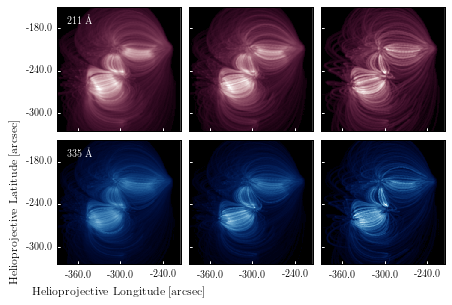

In [14]:
fig = plt.figure(figsize=get_figsize(wf=1,hf=2/3))
plt.subplots_adjust(hspace=0.075,wspace=0.0)
t = 1500
channels = [211,335]
for i,f in enumerate(['high_frequency', 'intermediate_frequency','low_frequency']):
    for j,c in enumerate(channels):
        m = Map(path_format.format(f,c,t))
        m = m.submap(SkyCoord(Tx=-390*u.arcsec,Ty=-325*u.arcsec,frame=m.coordinate_frame),
                     SkyCoord(Tx=-215*u.arcsec,Ty=-150*u.arcsec,frame=m.coordinate_frame))
        ax = fig.add_subplot(len(channels),3,3*j+i+1,projection=m)
        norm = ImageNormalize(
            vmin=0,vmax=Map(path_format.format('low_frequency',c,t)).data.max(),
            stretch=SqrtStretch())
        m.plot(axes=ax,title=False,annotate=False,norm=norm)
        ax.grid(alpha=0)
        lon,lat = ax.coords
        lon.set_ticks(color='w',number=4)
        lat.set_ticks(color='w',number=4)
        if i>0:
            lat.set_ticklabel_visible(False)
        if j < len(channels)-1:
            lon.set_ticklabel_visible(False)
        if i==0 and j==(len(channels)-1):
            lon.set_axislabel(r'Helioprojective Longitude [arcsec]',
                              fontsize=plt.rcParams['axes.labelsize'])
            lat.set_axislabel(r'Helioprojective Latitude [arcsec]',
                              fontsize=plt.rcParams['axes.labelsize'])
        #if j==0:
        #    ax.set_title(f'{f.split("_")[0].capitalize()}')
        if i == 0:
            xtext,ytext = m.world_to_pixel(
                SkyCoord(-375*u.arcsec, -175*u.arcsec, frame=m.coordinate_frame))
            ax.text(xtext.value,ytext.value,f'{c} $\mathrm{{\AA}}$',
                    color='w',fontsize=plt.rcParams['xtick.labelsize'])
fig.savefig('figures/intensity_maps_2.pdf')

## Timelags
First, show timelag plots for the simulations, all 5 heating types

In [6]:
heating = ['high_frequency', 'intermediate_frequency', 'low_frequency', 'cooling_outofphase_long', 'cooling']
labels = ['High', 'Intermediate', 'Low', 'Random', 'Cooling']

In [7]:
channel_pairs = [(94,335),
                 #(94,171),
                 #(94,193),
                 #(94,131),
                 #(94,211),
                 #(335,131),
                 #(335,193),
                 #(335,211), 
                 #(335,171),
                 (211,131),
                 #(211,171),
                 #(211,193),
                 (193,171),
                 #(193,131),
                 #(171,131),
                ]

In [8]:
file_format = '/storage-home/w/wtb2/data/timelag_synthesis_v2/{}/nei/timelags/{}_{}_{}.fits'

In [9]:
correlation_threshold = 0.01

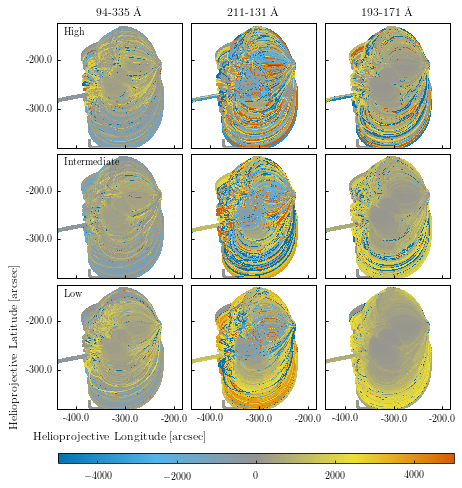

In [69]:
heating = ['high_frequency', 'intermediate_frequency', 'low_frequency', ]
labels = ['High', 'Intermediate', 'Low',]
fig = plt.figure(figsize=get_figsize(wf=1, hf=len(heating)/3))
cax = fig.add_axes([0.13, 0.02, 0.775, 0.02])
for j,h in enumerate(heating):
    for i,cp in enumerate(channel_pairs):
        m = Map(file_format.format(h,'timelag',*cp))
        mc = Map(file_format.format(h,'correlation',*cp))
        m = Map(m.data, m.meta, mask=np.where(mc.data<=correlation_threshold, True, False))
        m = m.submap(SkyCoord(Tx=-440*u.arcsec,Ty=-380*u.arcsec,frame=m.coordinate_frame),
                     SkyCoord(Tx=-185*u.arcsec,Ty=-125*u.arcsec,frame=m.coordinate_frame))
        ax = fig.add_subplot(len(heating), len(channel_pairs), len(channel_pairs)*j+i+1, projection=m)
        im = m.plot(axes=ax,
                    title=False,
                    annotate=False,
                    vmin=-(5e3*u.s).to(u.s).value,
                    vmax=(5e3*u.s).to(u.s).value,
                    cmap=timelag_cmap()
                   )
        ax.grid(alpha=0)
        lon = ax.coords[0]
        lat = ax.coords[1]
        lon.set_ticks(number=3)
        lat.set_ticks(number=4,) 
        if i == 0 and j == len(heating)-1:
            lat.set_axislabel(r'Helioprojective Latitude [arcsec]', fontsize=plt.rcParams['axes.labelsize'])
            lon.set_axislabel(r'Helioprojective Longitude [arcsec]', fontsize=plt.rcParams['axes.labelsize'])
        if i == 0:
            lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
        else:
            lat.set_ticklabel_visible(False)
        if j == len(heating)-1:
            lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
        else:
            lon.set_ticklabel_visible(False)
        if j == 0:
            ax.set_title('{}-{} $\mathrm{{\AA}}$'.format(*cp))
        if i == 0:
            xtext,ytext = m.world_to_pixel(
                SkyCoord(-425*u.arcsec, -150*u.arcsec, frame=m.coordinate_frame))
            ax.text(xtext.value,ytext.value,labels[j],
                    color='k',fontsize=plt.rcParams['xtick.labelsize'])
plt.subplots_adjust(wspace=0.05,hspace=0.05)
cbar = fig.colorbar(im, cax=cax,orientation='horizontal')
fig.savefig('figures/model_timelags_1.pdf')

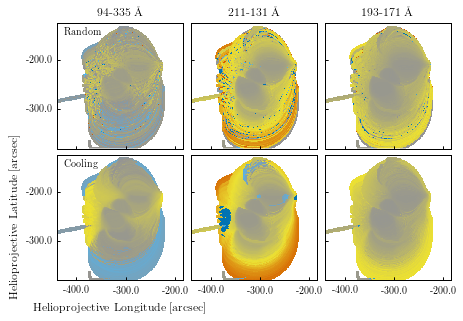

In [70]:
heating = ['cooling_outofphase_long', 'cooling']
labels = ['Random', 'Cooling']
fig = plt.figure(figsize=get_figsize(wf=1, hf=len(heating)/3))
#cax = fig.add_axes([0.13, 0.0, 0.775, 0.03])
for j,h in enumerate(heating):
    for i,cp in enumerate(channel_pairs):
        m = Map(file_format.format(h,'timelag',*cp))
        mc = Map(file_format.format(h,'correlation',*cp))
        m = Map(m.data, m.meta, mask=np.where(mc.data<=correlation_threshold, True, False))
        m = m.submap(SkyCoord(Tx=-440*u.arcsec,Ty=-380*u.arcsec,frame=m.coordinate_frame),
                     SkyCoord(Tx=-185*u.arcsec,Ty=-125*u.arcsec,frame=m.coordinate_frame))
        ax = fig.add_subplot(len(heating), len(channel_pairs), len(channel_pairs)*j+i+1, projection=m)
        im = m.plot(axes=ax,
                    title=False,
                    annotate=False,
                    vmin=-(5e3*u.s).to(u.s).value,
                    vmax=(5e3*u.s).to(u.s).value,
                    cmap=timelag_cmap()
                   )
        ax.grid(alpha=0)
        lon = ax.coords[0]
        lat = ax.coords[1]
        lon.set_ticks(number=3)
        lat.set_ticks(number=4,) 
        if i == 0 and j == len(heating)-1:
            lat.set_axislabel(r'Helioprojective Latitude [arcsec]', fontsize=plt.rcParams['axes.labelsize'])
            lon.set_axislabel(r'Helioprojective Longitude [arcsec]', fontsize=plt.rcParams['axes.labelsize'])
        if i == 0:
            lat.set_ticklabel(fontsize=plt.rcParams['ytick.labelsize'])
        else:
            lat.set_ticklabel_visible(False)
        if j == len(heating)-1:
            lon.set_ticklabel(fontsize=plt.rcParams['xtick.labelsize'])
        else:
            lon.set_ticklabel_visible(False)
        if j == 0:
            ax.set_title('{}-{} $\mathrm{{\AA}}$'.format(*cp))
        if i == 0:
            xtext,ytext = m.world_to_pixel(
                SkyCoord(-425*u.arcsec, -150*u.arcsec, frame=m.coordinate_frame))
            ax.text(xtext.value,ytext.value,labels[j],
                    color='k',fontsize=plt.rcParams['xtick.labelsize'])
plt.subplots_adjust(wspace=0.05,hspace=0.05)
#cbar = fig.colorbar(im, cax=cax,orientation='horizontal')
fig.savefig('figures/model_timelags_2.pdf')